# The beta-binomial distribution

Question: can the beta-binomial distribution be seen as an order statistic of a discrete uniform distribution?

In [7]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

Sadly beta binomial is on in scipy. This might be something to contribute to in the future.

So: choose `n_rolls` numbers between 0 and `n-sides-1` and find the smallest, next smallest, etc. Do this many `n_trials` times and look at the distribution.

In [8]:
def get_ordered_data(n_trials, n_sides, n_rolls):
    results = stats.randint(0, n_sides).rvs((n_trials, n_rolls))
    results.sort(axis=1)
    return results

In [9]:
def simulate_bb_dist(ax, n_trials, n_sides, n_rolls):
    results = get_ordered_data(n_trials=n_trials, n_sides=n_sides, n_rolls=n_rolls)
    side_array = np.array(range(n_sides))
    for i_roll in range(n_rolls):
        ax.plot(side_array, (results[:, [i_roll]] == side_array).mean(axis=0), '.-', label=i_roll)
    ax.legend()

In [20]:
n_sides = 10
n_rolls = 5
n_trials = 100000

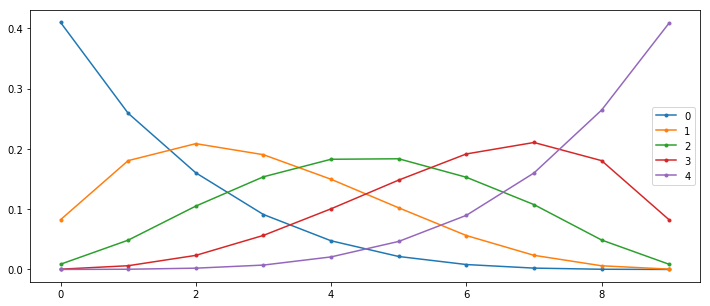

In [21]:
fig, ax = plt.subplots(figsize=(12, 5))
simulate_bb_dist(ax, n_trials=n_trials, n_sides=n_sides, n_rolls=n_rolls)

Which at least looks like a beta-binomial distribution.

In [22]:
def bb_pmt(k, n, a, b):
    return (scipy.special.comb(n, k) *
            scipy.special.beta(k+a, n-k+b) /
            scipy.special.beta(a, b))

In [23]:
[f'{x:.4f}' for x in bb_pmt(ks, n_sides, 5, n_sides-5)]

['0.0108', '0.0387', '0.0804']

In [24]:
scipy.special.beta(1,4)

0.25

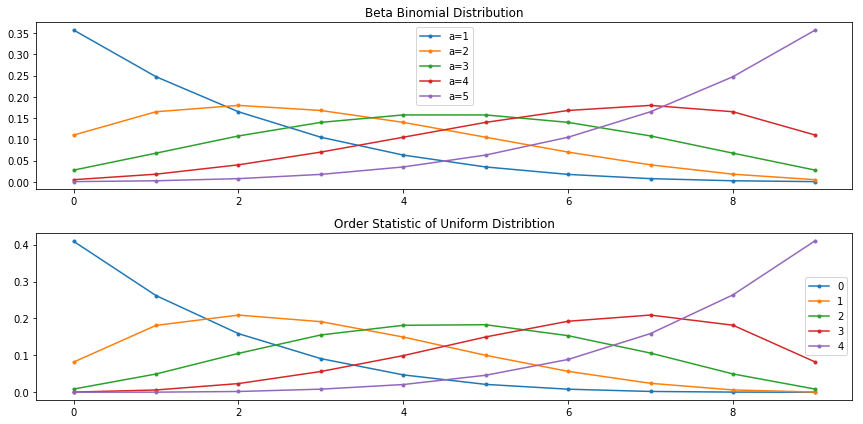

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(12, 6))
ks = np.arange(n_sides+1)
for a in range(1, n_rolls+1):
    ks = np.arange(n_sides)
    axs[0].plot(ks, bb_pmt(ks, n_sides-1, a, n_rolls-a+1), '.-', label=f"a={a}")
axs[0].legend()
axs[0].set_title("Beta Binomial Distribution")
simulate_bb_dist(axs[1], n_trials=n_trials, n_sides=n_sides, n_rolls=n_rolls)
axs[1].set_title("Order Statistic of Uniform Distribtion")
fig.tight_layout()

These almost look the same, but aren't quite.

Up next:

Figure out what distribution is given by the order statistic of the uniform distribution. Thismay be difficult.